In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from scipy import stats
from scipy.stats import norm

In [209]:
data_train=pd.read_csv("data/Train.csv")
data_test=pd.read_csv("data/Test.csv")

In [210]:
labels_train=data_train['Item_Outlet_Sales']


In [211]:
data_train.shape, data_test.shape

((8523, 12), (5681, 11))

In [212]:
all_data=data_train.append(data_test)

In [213]:
all_data.shape

(14204, 12)

In [214]:
all_data.iloc[8000:, :]

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
8000,Low Fat,FDS55,150.0734,4454.2020,Fruits and Vegetables,0.081329,7.020,2002,OUT045,Tier 2,NaN,Supermarket Type1
8001,Low Fat,FDT21,247.1092,4233.1564,Snack Foods,0.020388,7.420,2004,OUT035,Tier 2,Small,Supermarket Type1
8002,Low Fat,NCR38,253.5724,5033.4480,Household,0.113518,17.250,1997,OUT046,Tier 1,Small,Supermarket Type1
8003,Low Fat,FDJ22,190.6504,1342.2528,Snack Foods,0.052917,18.750,2002,OUT045,Tier 2,NaN,Supermarket Type1
8004,reg,FDB57,220.5772,2446.1492,Fruits and Vegetables,0.018911,20.250,2007,OUT017,Tier 2,NaN,Supermarket Type1
8005,Regular,FDR52,192.3846,1910.8460,Frozen Foods,0.075981,12.650,1987,OUT013,Tier 3,High,Supermarket Type1
8006,Low Fat,NCO41,96.7384,2167.8448,Health and Hygiene,0.018849,12.500,1997,OUT046,Tier 1,Small,Supermarket Type1
8007,Low Fat,FDG47,261.4252,262.3252,Starchy Foods,0.116528,12.800,1998,OUT010,Tier 3,NaN,Grocery Store
8008,Low Fat,FDB44,212.4586,2743.7618,Fruits and Vegetables,0.000000,6.655,2007,OUT017,Tier 2,NaN,Supermarket Type1
8009,Low Fat,FDY14,263.0226,4229.1616,Dairy,0.070040,10.300,1997,OUT046,Tier 1,Small,Supermarket Type1


In [215]:
data_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [216]:
data_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [217]:
data_train.columns[data_train.isnull().any()]

Index([u'Item_Weight', u'Outlet_Size'], dtype='object')

In [218]:
data_test.columns[data_test.isnull().any()]

Index([u'Item_Weight', u'Outlet_Size'], dtype='object')

In [219]:
all_data.columns[all_data.isnull().any()]

Index([u'Item_Outlet_Sales', u'Item_Weight', u'Outlet_Size'], dtype='object')

In [220]:
data_train.select_dtypes(exclude=[np.number]).columns

Index([u'Item_Identifier', u'Item_Fat_Content', u'Item_Type',
       u'Outlet_Identifier', u'Outlet_Size', u'Outlet_Location_Type',
       u'Outlet_Type'],
      dtype='object')

In [221]:
data_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


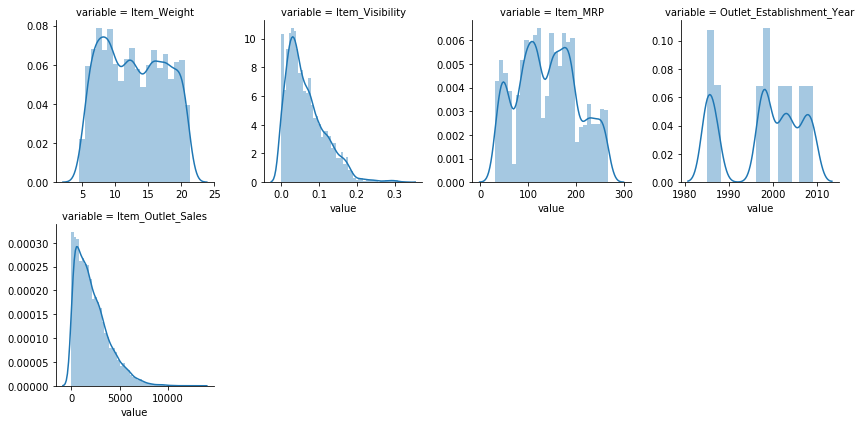

In [222]:
num = [f for f in data_train.columns if data_train.dtypes[f] != 'object']

nd = pd.melt(data_train, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

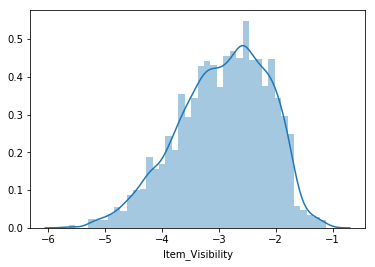

In [223]:
sns.distplot(np.log(data_train[data_train['Item_Visibility']>0]['Item_Visibility']))

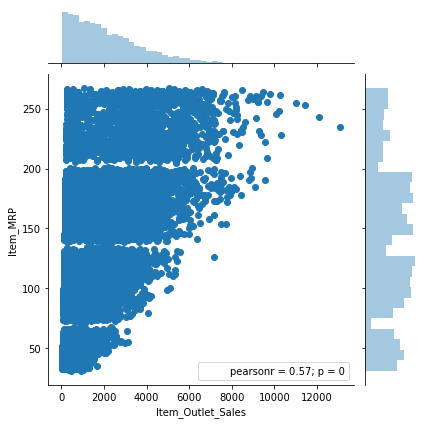

In [224]:
sns.jointplot(data_train['Item_Outlet_Sales'], data_train['Item_MRP'])

In [225]:
numeric=data_train.select_dtypes(include=[np.number])
categoric=data_train.select_dtypes(exclude=[np.number])
categoric

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
5,FDP36,Regular,Baking Goods,OUT018,Medium,Tier 3,Supermarket Type2
6,FDO10,Regular,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
7,FDP10,Low Fat,Snack Foods,OUT027,Medium,Tier 3,Supermarket Type3
8,FDH17,Regular,Frozen Foods,OUT045,NaN,Tier 2,Supermarket Type1
9,FDU28,Regular,Frozen Foods,OUT017,NaN,Tier 2,Supermarket Type1


In [226]:
all_data.columns[all_data.isnull().any()]

Index([u'Item_Outlet_Sales', u'Item_Weight', u'Outlet_Size'], dtype='object')

In [227]:
correlation=numeric.corr()

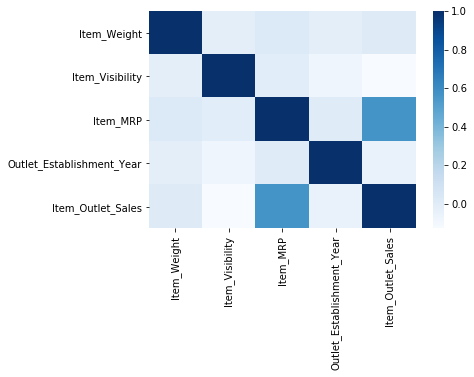

In [228]:
sns.heatmap(correlation, cmap="Blues")

In [229]:
correlation['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

/Users/maxim/anaconda3/envs/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/maxim/anaconda3/envs/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in divide


<module 'matplotlib.pylab' from '/Users/maxim/anaconda3/envs/tensorflow/lib/python2.7/site-packages/matplotlib/pylab.pyc'>

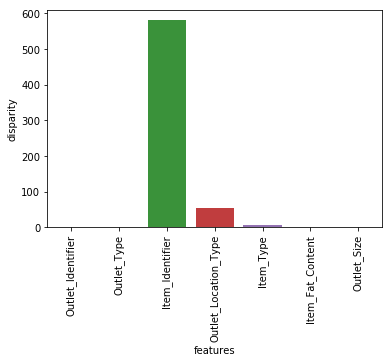

In [230]:
cat = [f for f in data_train.columns if data_train.dtypes[f] == 'object']
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
           samples = []
           for cls in frame[c].unique():
                  s = frame[frame[c] == cls]['Item_outlet_Sales'].values
                  samples.append(s)
           pval = stats.f_oneway(*samples)[1]
           pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

categoric['Item_outlet_Sales'] = data_train.Item_Outlet_Sales.values
k = anova(categoric) 
k['disparity'] = np.log(1./k['pval'].values) 
sns.barplot(data=k, x = 'features', y='disparity') 
plt.xticks(rotation=90) 
plt 


In [231]:
data_train.Item_Outlet_Sales.values.shape

(8523,)

In [232]:
all_data.columns[all_data.isnull().any()]

Index([u'Item_Outlet_Sales', u'Item_Weight', u'Outlet_Size'], dtype='object')

In [233]:
all_data['Item_Weight'].fillna(all_data['Item_Weight'].mean(), inplace=True)

In [234]:
all_data['Outlet_Size'].fillna('Medium', inplace=True)

In [235]:
all_data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,14204.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.234226,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,9.300000,1987.000000
50%,142.247000,1794.331000,0.054021,12.792854,1999.000000
75%,185.855600,3101.296400,0.094037,16.000000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [236]:
all_data.columns[all_data.isnull().any()]

Index([u'Item_Outlet_Sales'], dtype='object')

In [237]:
all_data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [238]:
all_data['Item_Fat_Content']=all_data['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [239]:
all_data['Item_Identifier_Digit2']=all_data['Item_Identifier'].apply(lambda x: x[0:2])
all_data['Item_Identifier_Digit2'].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Identifier_Digit2, dtype: int64

In [240]:
all_data.loc[all_data['Item_Identifier_Digit2']=="NC",'Item_Fat_Content'] = "Non-Edible"

In [241]:
all_data['Item_Identifier'].value_counts()

NCK18    10
FDL46    10
DRH39    10
FDX50    10
FDO01    10
FDL40    10
FDG10    10
NCG18    10
FDS25    10
FDO08    10
NCF54    10
DRL49    10
FDT13    10
NCC06    10
FDG33    10
NCX05    10
NCV41    10
NCT18    10
FDN03    10
DRG37    10
FDM39    10
FDP15    10
FDB20    10
DRH37    10
FDQ47    10
FDB23    10
FDQ45    10
FDA49    10
FDQ28    10
FDQ49    10
         ..
NCL29     8
FDR55     8
NCS18     8
NCE55     8
FDD52     8
FDV33     8
FDU19     8
FDW52     8
DRN59     8
FDI52     8
NCS17     8
FDW37     8
FDI57     8
FDY44     8
NCU06     8
FDG14     8
DRB24     8
FDR51     7
FDM10     7
FDI46     7
FDM50     7
FDM52     7
NCW54     7
NCL42     7
FDH58     7
FDS22     7
FDX49     7
DRN11     7
FDO33     7
FDL50     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [242]:
all_data.columns[all_data.isnull().any()]

Index([u'Item_Outlet_Sales'], dtype='object')

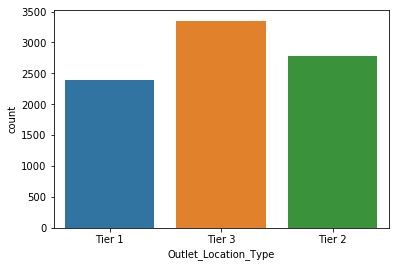

In [243]:
sns.countplot(x = 'Outlet_Location_Type', data=data_train)

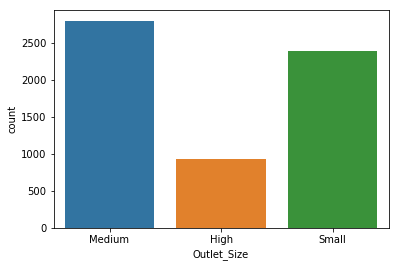

In [244]:
sns.countplot(x = 'Outlet_Size', data=data_train)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

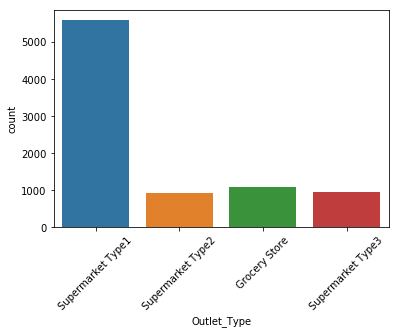

In [245]:
g=sns.countplot(x = 'Outlet_Type', data=data_train)
plt.xticks(rotation=45)

In [246]:
all_data.loc[all_data['Item_Visibility']==0,'Item_Visibility'] = all_data[all_data['Item_Visibility']>0]['Item_Visibility'].mean()

In [247]:
all_data['Item_Visibility']

0       0.016047
1       0.019278
2       0.016760
3       0.070303
4       0.070303
5       0.070303
6       0.012741
7       0.127470
8       0.016687
9       0.094450
10      0.070303
11      0.045464
12      0.100014
13      0.047257
14      0.068024
15      0.069089
16      0.008596
17      0.069196
18      0.034238
19      0.102492
20      0.138190
21      0.035400
22      0.025698
23      0.057557
24      0.025896
25      0.099887
26      0.066693
27      0.019356
28      0.161467
29      0.072222
          ...   
5651    0.048645
5652    0.087847
5653    0.028977
5654    0.070303
5655    0.099375
5656    0.158425
5657    0.035911
5658    0.037656
5659    0.044073
5660    0.026065
5661    0.070303
5662    0.026234
5663    0.033516
5664    0.045168
5665    0.024110
5666    0.014019
5667    0.045270
5668    0.288892
5669    0.072529
5670    0.037092
5671    0.054463
5672    0.036594
5673    0.094053
5674    0.030704
5675    0.070411
5676    0.013496
5677    0.142991
5678    0.0735

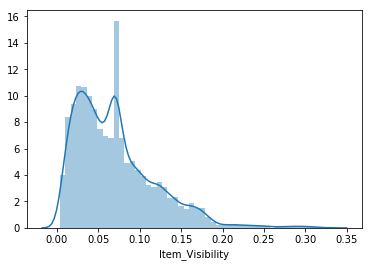

In [248]:
sns.distplot(all_data['Item_Visibility'])

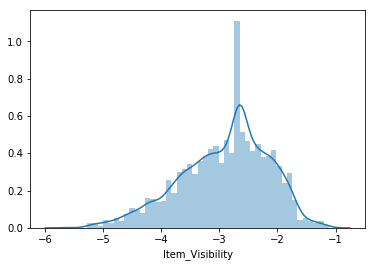

In [249]:
sns.distplot(np.log(all_data['Item_Visibility']))

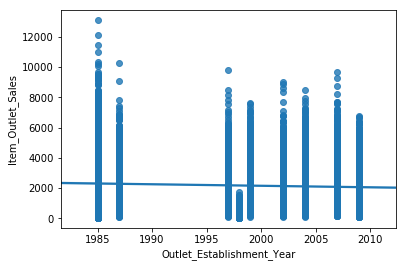

In [250]:
sns.regplot(all_data['Outlet_Establishment_Year'], all_data['Item_Outlet_Sales'])

In [251]:
all_data['Age']=2018 - all_data['Outlet_Establishment_Year']

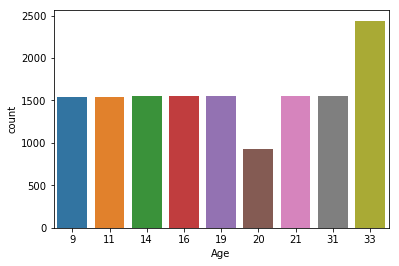

In [252]:
sns.countplot(x="Age", data=all_data)

In [253]:
del all_data['Item_Outlet_Sales']

In [254]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def factorize(data, var, fill_na = None):
      if fill_na is not None:
            data[var].fillna(fill_na, inplace=True)
      le.fit(data[var])
      data[var] = le.transform(data[var])
      return data

In [255]:
all_data.select_dtypes(exclude=[np.number]).columns

Index([u'Item_Fat_Content', u'Item_Identifier', u'Item_Type',
       u'Outlet_Identifier', u'Outlet_Location_Type', u'Outlet_Size',
       u'Outlet_Type', u'Item_Identifier_Digit2'],
      dtype='object')

In [256]:
all_data['Outlet_Location_Type']=all_data['Outlet_Location_Type'].map({'Tier 1': 3, 'Tier 2': 2, 'Tier 3': 1})

In [257]:
all_data['Outlet_Type']=all_data['Outlet_Type'].map({'Grocery Store': 1, 'Supermarket Type1': 2, 'Supermarket Type2': 3,'Supermarket Type3': 4})

In [258]:
all_data['Outlet_Size']=all_data['Outlet_Size'].map({'Small': 1, 'Medium': 2, 'High': 3})

In [260]:
all_data = factorize(all_data, "Item_Fat_Content")
all_data = factorize(all_data, "Item_Identifier")
all_data = factorize(all_data, "Item_Type")
all_data = factorize(all_data, "Outlet_Identifier")
all_data = factorize(all_data, "Item_Identifier_Digit2")


In [261]:
all_data

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Identifier_Digit2,Age
0,0,156,249.8092,4,0.016047,9.300000,1999,9,3,2,2,1,19
1,2,8,48.2692,14,0.019278,5.920000,2009,3,1,2,3,0,9
2,0,662,141.6180,10,0.016760,17.500000,1999,9,3,2,2,1,19
3,2,1121,182.0950,6,0.070303,19.200000,1998,0,1,2,1,1,20
4,1,1297,53.8614,9,0.070303,8.930000,1987,1,1,3,2,2,31
5,2,758,51.4008,0,0.070303,10.395000,2009,3,1,2,3,1,9
6,2,696,57.6588,13,0.012741,13.650000,1987,1,1,3,2,1,31
7,0,738,107.7622,13,0.127470,12.792854,1985,5,1,2,4,1,33
8,2,440,96.9726,5,0.016687,16.200000,2002,7,2,2,2,1,16
9,2,990,187.8214,5,0.094450,19.200000,2007,2,2,2,2,1,11


In [264]:
all_data = pd.get_dummies(all_data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Identifier_Digit2'])


In [265]:
all_data.dtypes

Item_Identifier                int64
Item_MRP                     float64
Item_Type                      int64
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier              int64
Age                            int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Location_Type_3         uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Size_3                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Outlet_Type_4                  uint8
Item_Identifier_Digit2_0       uint8
Item_Identifier_Digit2_1       uint8
Item_Identifier_Digit2_2       uint8
dtype: object

In [266]:
data_train=all_data.iloc[:8523, :]

In [267]:
data_test=all_data.iloc[8523:, :]

In [268]:
data_train.shape, data_test.shape

((8523, 24), (5681, 24))

In [269]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(data_train, labels_train)

/Users/maxim/anaconda3/envs/tensorflow/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [270]:
ypred=clf.predict(data_test)

In [271]:
y_pred=pd.DataFrame(ypred)
writer = pd.ExcelWriter('big_mart_sales.xlsx')
y_pred.to_excel(writer,'Sheet1')
writer.save()

In [304]:
scores = np.array([[1, 2, 3, 6],
                   [2, 4, 5, 6],
                   [3, 8, 7, 6]])


In [306]:
print(np.sum(scores, axis=0))

[ 6 14 15 18]


In [309]:
scores/(1.0*np.sum(scores, axis=0))

array([[ 0.16666667,  0.14285714,  0.2       ,  0.33333333],
       [ 0.33333333,  0.28571429,  0.33333333,  0.33333333],
       [ 0.5       ,  0.57142857,  0.46666667,  0.33333333]])

In [314]:
np.exp(scores)/np.sum(np.exp(scores), axis=0)

array([[ 0.09003057,  0.00242826,  0.01587624,  0.33333333],
       [ 0.24472847,  0.01794253,  0.11731043,  0.33333333],
       [ 0.66524096,  0.97962921,  0.86681333,  0.33333333]])